# Testowanie

## Wczytanie danych testowych

In [1]:
import pandas as pd
import os
from google.colab import drive
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
#"MQTT-DoS-Connect","MQTT-DDoS-Publish","MQTT-DDoS-Connect","MQTT-Malformed","MQTT-DoS-Publish",

typelist=["DDoS-ICMP","MQTT-DoS-Connect","MQTT-DDoS-Publish","MQTT-DDoS-Connect","MQTT-Malformed","MQTT-DoS-Publish","DDoS-SYN","DDoS-TCP","DDoS-UDP","DoS-ICMP","DoS-SYN","DoS-TCP","DoS-UDP","OS_Scan","Ping_Sweep","Port_Scan","VulScan"]

# Montowanie Google Drive
drive.mount('/content/drive')

# Ścieżka do folderu z plikami CSV

folder_path = '//content/drive/MyDrive/csv_files/train'
folder_path = '//content/drive/MyDrive/csv_files/test'

# Funkcja do wczytywania i przetwarzania plików
def preprocess_data(file_path):
    # Wczytywanie danych
    df = pd.read_csv(file_path)

    # Usuwanie zbędnych kolumn, jeśli istnieją
    columns_to_drop = ['No.', 'Info']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

    # Kodowanie zmiennych kategorycznych
    label_encoders = {}
    for col in ['Source', 'Destination']:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le

    # One-Hot Encoding dla kolumny 'Protocol'
    if 'Protocol' in df.columns:
        df = pd.get_dummies(df, columns=['Protocol'], drop_first=True)

    # Normalizacja danych numerycznych, jeśli kolumny istnieją
    scaler = StandardScaler()
    numeric_columns = [col for col in ['IAT','AVG','Tot size','Duration','Rate','Srate'] if col in df.columns]
    if numeric_columns:
        df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    return df, label_encoders, scaler

# Iterowanie przez wszystkie pliki w folderze
processed_data = {}
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dataframe_name = os.path.splitext(file_name)[0]
        dataframe_name = dataframe_name.replace("TCP_IP-", "")
        dataframe_name = dataframe_name.replace(".pcap", "")
        try:
            df_cleaned, le, scaler = preprocess_data(file_path)
            for typ in typelist:
              if typ in dataframe_name:
                  df_cleaned['Attack'] = pd.Series(typ, index=df_cleaned.index)
                  print(dataframe_name)
                  print(df.shape)
                  processed_data[dataframe_name] = df_cleaned
                  break


            print(f"Plik {dataframe_name} przetworzony!")
        except Exception as e:
            print(f"Błąd przetwarzania pliku {dataframe_name}: {e}")



Mounted at /content/drive
Recon-OS_Scan_test
(3834, 45)
Plik Recon-OS_Scan_test przetworzony!
Recon-Ping_Sweep_test
(186, 45)
Plik Recon-Ping_Sweep_test przetworzony!
Recon-VulScan_test
(1034, 45)
Plik Recon-VulScan_test przetworzony!
DDoS-ICMP2_test
(195692, 45)
Plik DDoS-ICMP2_test przetworzony!
DDoS-SYN_test
(172397, 45)
Plik DDoS-SYN_test przetworzony!
DDoS-TCP_test
(182598, 45)
Plik DDoS-TCP_test przetworzony!
DDoS-ICMP1_test
(154007, 45)
Plik DDoS-ICMP1_test przetworzony!
DoS-ICMP_test
(98432, 45)
Plik DoS-ICMP_test przetworzony!


In [2]:
processed_data['DDoS-ICMP1_test']

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack
0,0.0,1.0,-0.229135,-0.289674,-0.289674,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.055129,16.154930,9.500000,9.165151,0.0,0.0,0.0,141.550000,DDoS-ICMP
1,0.0,1.0,0.544941,-0.289674,-0.289674,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.055129,0.004543,9.500000,9.165151,0.0,0.0,0.0,141.550000,DDoS-ICMP
2,0.0,1.0,1.319017,-0.289674,-0.289674,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.055129,0.004543,9.500000,9.165151,0.0,0.0,0.0,141.550000,DDoS-ICMP
3,0.0,1.0,-0.229135,-0.289674,-0.289674,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.055129,0.004543,9.500000,9.165151,0.0,0.0,0.0,141.550000,DDoS-ICMP
4,0.0,1.0,1.319017,-0.289674,-0.289674,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.055129,0.004543,9.500000,9.165151,0.0,0.0,0.0,141.550000,DDoS-ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154002,0.0,1.0,-0.229135,-0.289526,-0.289526,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.055129,0.004538,9.500000,9.165151,0.0,0.0,0.0,141.550000,DDoS-ICMP
154003,0.0,1.0,-0.229135,-0.289526,-0.289526,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.055129,0.004538,9.500000,9.165151,0.0,0.0,0.0,141.550000,DDoS-ICMP
154004,0.0,1.0,-0.229135,-0.289526,-0.289526,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.055129,0.004538,9.500000,9.165151,0.0,0.0,0.0,141.550000,DDoS-ICMP
154005,0.0,1.0,-0.229135,-0.289526,-0.289526,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.055129,0.004538,9.500000,9.165151,0.0,0.0,0.0,141.550000,DDoS-ICMP


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Dropout,LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Definicja modelu FCNN
model2 = Sequential([
    Dense(256, input_dim=18, activation='relu'),  # Pierwsza warstwa ukryta
    Dropout(0.3),  # Regularizacja
    Dense(128, activation='relu'),  # Druga warstwa ukryta
    Dropout(0.3),
    Dense(64, activation='relu'),  # Trzecia warstwa ukryta
    Dense(17, activation='softmax')  # Warstwa wyjściowa z 17 klasami
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.load_weights('model.weights.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Predykcje

In [5]:
test_dataset=pd.DataFrame()

In [6]:
# jeden zbior danych
for item in processed_data:
  test_dataset=pd.concat([test_dataset,processed_data[item]])

In [7]:
X_test=test_dataset[['Protocol Type','Duration','Rate','Srate','syn_flag_number','rst_flag_number','psh_flag_number','ack_flag_number','syn_count','fin_count','rst_count','ICMP','TCP','UDP','ARP','IAT','AVG','Tot size']]

Y_test=test_dataset['Attack']

In [8]:
# Zakładam, że Y jest listą lub kolumną z etykietami tekstowymi
label_encoder = LabelEncoder()
Y_test_encoded = label_encoder.fit_transform(Y_test)

# Jeśli chcesz zobaczyć mapowanie:
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

{'DDoS-ICMP': 0, 'DDoS-SYN': 1, 'DDoS-TCP': 2, 'DoS-ICMP': 3, 'OS_Scan': 4, 'Ping_Sweep': 5, 'VulScan': 6}


In [9]:
from tensorflow.keras.utils import to_categorical

# Liczba klas
num_classes = len(label_encoder.classes_)
# do one hot encoding bo funkcja straty kategorical crossentropy tak potrzebuje
# Konwersja do one-hot
Y_test_one_hot = to_categorical(Y_test_encoded, num_classes=num_classes)

In [10]:
Y_test_one_hot[1]

array([0., 0., 0., 0., 1., 0., 0.])

In [11]:
Y_test_one_hot_full=[i for i in Y_test_one_hot if i[0]==1]

In [12]:
import numpy as np
from tensorflow.keras.utils import Sequence

class PredictionDataGenerator(Sequence):
    def __init__(self, X, batch_size):
        # Konwersja danych na NumPy array
        self.X = X.to_numpy()
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X))

    def __len__(self):
        # Liczba batchy na epokę
        return int(np.ceil(len(self.X) / self.batch_size))

    def __getitem__(self, idx):
        # Wczytanie batcha
        start_idx = idx * self.batch_size
        end_idx = min((idx + 1) * self.batch_size, len(self.X))


        batch_indexes = self.indexes[start_idx:end_idx]
        batch_X = self.X[batch_indexes]

        return batch_X

    #def on_epoch_end(self):
        # Możesz przetasować dane, jeśli potrzebujesz
       # self.indexes = np.random.permutation(len(self.X))

In [13]:
dt_gen=PredictionDataGenerator(X_test,1024)

In [14]:
Y_pred=model2.predict(dt_gen)


  1/790 ━━━━━━━━━━━━━━━━━━━━ 4:18 328ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [15]:
Y_pred

array([[3.1570162e-05, 2.5063038e-03, 4.1498985e-05, ..., 6.4850138e-07,
        3.9848870e-01, 1.0513246e-04],
       [2.7838052e-04, 5.0703003e-03, 6.4538891e-04, ..., 2.3145914e-04,
        4.3379176e-01, 4.5787934e-03],
       [5.2292831e-04, 7.2818659e-02, 4.9159885e-03, ..., 1.2186465e-04,
        3.8162419e-01, 5.3059263e-04],
       ...,
       [8.9565134e-01, 2.6437774e-11, 7.8118845e-10, ..., 1.9880433e-09,
        9.9092724e-15, 8.3682631e-21],
       [8.9565134e-01, 2.6437774e-11, 7.8118845e-10, ..., 1.9880433e-09,
        9.9092724e-15, 8.3682631e-21],
       [5.0874639e-01, 4.0062965e-19, 6.5072662e-15, ..., 1.7168741e-18,
        8.3555171e-25, 1.1201124e-29]], dtype=float32)

In [16]:
y_bin_pred=np.argmax(Y_pred,axis=1)

In [17]:
y_bin_pred

array([13, 13, 13, ...,  0,  0,  0])

In [18]:
old_mapping = {'DDoS-ICMP': 0, 'DDoS-SYN': 1, 'DDoS-TCP': 2,
               'DoS-ICMP': 3, 'OS_Scan': 4, 'Ping_Sweep': 5, 'VulScan': 6}

new_mapping = {'DDoS-ICMP': 0, 'DDoS-SYN': 1, 'DDoS-TCP': 2, 'DDoS-UDP': 3,
               'DoS-ICMP': 4, 'DoS-SYN': 5, 'DoS-TCP': 6, 'DoS-UDP': 7,
               'MQTT-DDoS-Connect': 8, 'MQTT-DDoS-Publish': 9,
               'MQTT-DoS-Connect': 10, 'MQTT-DoS-Publish': 11,
               'MQTT-Malformed': 12, 'OS_Scan': 13, 'Ping_Sweep': 14,
               'Port_Scan': 15, 'VulScan': 16}

In [20]:
list(new_mapping.keys())

['DDoS-ICMP',
 'DDoS-SYN',
 'DDoS-TCP',
 'DDoS-UDP',
 'DoS-ICMP',
 'DoS-SYN',
 'DoS-TCP',
 'DoS-UDP',
 'MQTT-DDoS-Connect',
 'MQTT-DDoS-Publish',
 'MQTT-DoS-Connect',
 'MQTT-DoS-Publish',
 'MQTT-Malformed',
 'OS_Scan',
 'Ping_Sweep',
 'Port_Scan',
 'VulScan']

In [19]:
# Odwrócenie old_mapping: klucz => nazwa, wartość => indeks
inverse_old_mapping = {v: k for k, v in old_mapping.items()}

# Konwersja na nowe indeksy
new_indices = [new_mapping[inverse_old_mapping[cat]] for cat in np.argmax(Y_test_one_hot,axis=1)]

# Wynik: [0, 1, 4, 13, 14]

<ipython-input-21-845fdf5751e4>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mat.loc[i][j]=sum(1 for a , b in zip(new_indices,y_bin_pred) if a == i and b==j)


<Axes: >

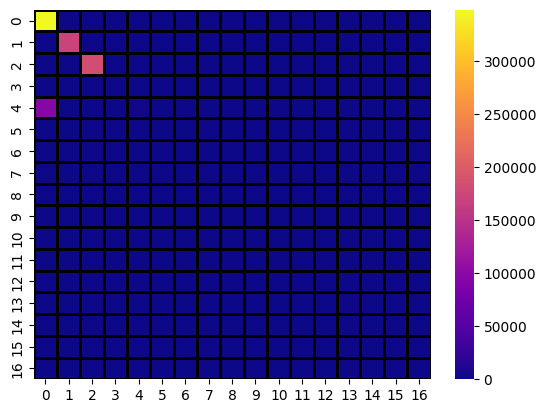

In [21]:
import seaborn as sns
import pandas as pd


mat=pd.DataFrame(0,columns=range(0,17,1),index=range(0,17,1))

for i in range(0,17,1):
  for j in range(0,17,1):
    mat.loc[i][j]=sum(1 for a , b in zip(new_indices,y_bin_pred) if a == i and b==j)



sns.heatmap(mat, annot = False, cmap ='plasma',
           linecolor ='black', linewidths = 1)

In [22]:
mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,348717,1,9,78,880,1,10,0,0,0,0,3,0,0,0,0,0
1,18,170937,734,90,75,217,53,11,102,25,1,72,2,25,0,35,0
2,25,0,182471,81,0,0,10,7,0,0,0,4,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,95009,0,35,4,3193,0,40,2,0,0,0,139,0,10,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
new_one_hot = np.eye(17)[new_indices]
print(new_one_hot)
new_one_hot[-1]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
list(y_bin_pred)
new_y_pred = np.eye(17)[list(y_bin_pred)]
print(new_y_pred)
new_y_pred[-1]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
from sklearn.metrics import log_loss
logloss = log_loss(new_one_hot, new_y_pred)
print(f"Log-loss: {logloss:.4f}")

Log-loss: 4.4792


In [27]:
from sklearn.metrics import classification_report

print(classification_report(new_one_hot, new_y_pred, target_names=list(new_mapping.keys())))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

        DDoS-ICMP       0.79      1.00      0.88    349699
         DDoS-SYN       1.00      0.99      1.00    172397
         DDoS-TCP       0.99      1.00      1.00    182598
         DDoS-UDP       0.00      0.00      0.00         0
         DoS-ICMP       0.77      0.03      0.06     98432
          DoS-SYN       0.00      0.00      0.00         0
          DoS-TCP       0.00      0.00      0.00         0
          DoS-UDP       0.00      0.00      0.00         0
MQTT-DDoS-Connect       0.00      0.00      0.00         0
MQTT-DDoS-Publish       0.00      0.00      0.00         0
 MQTT-DoS-Connect       0.00      0.00      0.00         0
 MQTT-DoS-Publish       0.00      0.00      0.00         0
   MQTT-Malformed       0.00      0.00      0.00         0
          OS_Scan       0.94      0.49      0.64      3834
       Ping_Sweep       0.83      0.68      0.75       186
        Port_Scan       0.00      0.00      0.00       

In [28]:
bad_predictions=[]
for i in range(len(y_bin_pred)):
  if y_bin_pred[i]!=new_indices[i]:
    bad_predictions.append(i)

In [29]:
b_p=len(bad_predictions)
b_p

100433

In [30]:
good_predictions=[]
for i in range(len(y_bin_pred)):
  if y_bin_pred[i]==new_indices[i]:
    good_predictions.append(i)

In [31]:
g_p=len(good_predictions)
g_p

707747

In [32]:
(g_p*100)/(g_p+b_p)

87.57294167140984


>  około 87,66 % wyników jest poprawnych


